In [18]:
import numpy as np
data = np.load('10ABBA100_1.npz')
print(data.files)
data1 = np.load('10ABBA100_2.npz')
print(data.files)

['Efavg_30000']
['Efavg_30000']


/tmp/ipykernel_230250/779468547.py:19: RuntimeWarning: invalid value encountered in divide
  return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))


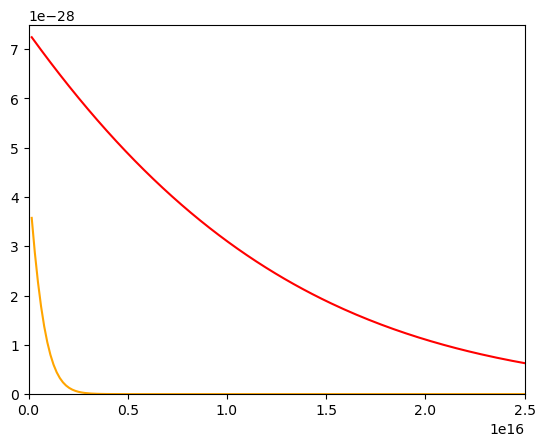

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
from time import sleep
import sys
#setup some constants and parameters
M=2**16 #模擬步數
tsim=7e-12 #模擬長度
eps0 = 8.854187e-12 
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12 # hbar/kb
T=30000
deltap = np.sqrt(1/3/eps0/hbar/c)*kb*T #小delta 

def D(omega,T):
    return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*1e15
omega = frequency*np.pi*2
plt.xlim(0,25e15)
plt.ylim(0,7.5e-28)
plt.plot(omega,D(omega*1e1,30000),'orange')
plt.plot(omega,D(omega,50000),'red')
plt.savefig('1.png')
#plt.xlabel('Frequency (PHz)')
#plt.ylabel('Energy density (J/m)')

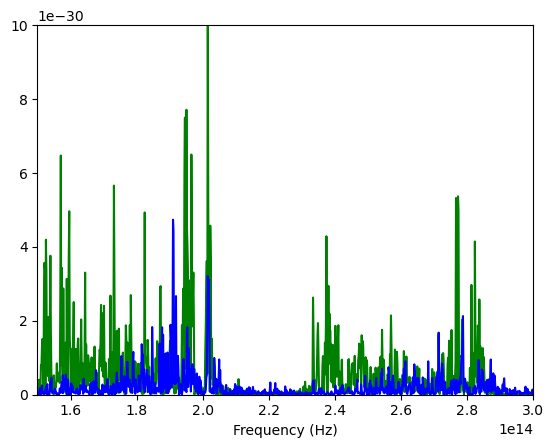

In [22]:
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
import matplotlib.pyplot as plt
Efavg = data['Efavg_30000']
Efavg1 = data1['Efavg_30000']
freqs = np.linspace(1.5e14,3e14,1000)
#plt.plot(freqs,Efavg,'.')
#plt.plot(omega,D(omega*20,30000),'orange')
plt.plot(freqs,Efavg*tsim*eps0*4*np.pi*3/M/200,'-''g')
plt.plot(freqs,Efavg1*tsim*eps0*4*np.pi*3/M/200,'-''b')
plt.xlim(1.5e14,3e14)
plt.ylim(0,1e-29)
plt.xlabel('Frequency (Hz)')
#plt.ylabel('Magnitude')
plt.savefig('3_50000.png')
plt.show()


In [1]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('10ABBA.png','new10ABBA.png')